We will use `matplotlib.pyplot` for plotting and scipy's netcdf package for reading the model output. The `%pylab inline` causes figures to appear in the page and conveniently alias pyplot to `plt` (which is becoming a widely used alias).

This analysis assumes you changed `DAYMAX` to some multiple of 5 so that there are multiple time records in the model output.

To see this notebook with figures, see https://gist.github.com/adcroft/2a2b91d66625fd534372.

In [1]:
%pylab inline
import scipy.io.netcdf

Populating the interactive namespace from numpy and matplotlib


We first create a netcdf object, or "handle", to the netcdf file. We'll also list all the objects in the netcdf object.

In [2]:
prog_file = scipy.io.netcdf_file('high/prog__0001_006.nc')
prog_file.variables

OrderedDict([('xq', <scipy.io.netcdf.netcdf_variable at 0x1138d2ef0>),
             ('yh', <scipy.io.netcdf.netcdf_variable at 0x1138d2eb8>),
             ('zl', <scipy.io.netcdf.netcdf_variable at 0x1138d2f98>),
             ('Time', <scipy.io.netcdf.netcdf_variable at 0x1138e0160>),
             ('xh', <scipy.io.netcdf.netcdf_variable at 0x1138e0128>),
             ('yq', <scipy.io.netcdf.netcdf_variable at 0x1138e0208>),
             ('zi', <scipy.io.netcdf.netcdf_variable at 0x1138e0320>),
             ('u', <scipy.io.netcdf.netcdf_variable at 0x1138e0438>),
             ('v', <scipy.io.netcdf.netcdf_variable at 0x1138e04a8>),
             ('h', <scipy.io.netcdf.netcdf_variable at 0x1138e0550>),
             ('e', <scipy.io.netcdf.netcdf_variable at 0x1138e05c0>)])

Now we will create a variable object for the "e" variable in the file. Again, I'm labelling it as a handle to distinguish it from a numpy array or raw data.

We'll also look at an "attribute" and print the shape of the data.

In [3]:
e_handle = prog_file.variables['e']
print('Description =', e_handle.long_name)
print('Shape =',e_handle.shape)

Description = b'Interface Height Relative to Mean Sea Level'
Shape = (2, 3, 180, 196)


"e" is 4-dimensional. netcdf files and objects are index [n,k,j,i] for the time-, vertical-, meridional-, zonal-axes.

Let's take a quick look at the first record [n=0] of the top interface [k=0]. 

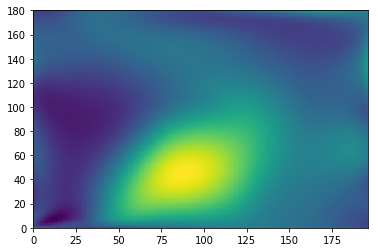

In [4]:
plt.pcolormesh( e_handle[0,0] )

The data looks OKish. No scale! And see that "`<matplotlib...>`" line? That's a handle returned by the matplotlib function. Hide it with a semicolon. Let's add a scale and change the colormap.

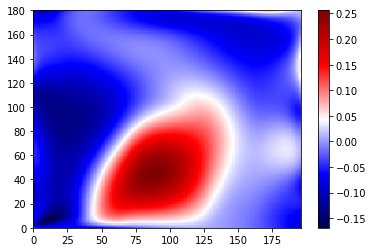

In [5]:
plt.pcolormesh( e_handle[0,0], cmap=cm.seismic ); plt.colorbar();

We have 4D data but can only visualize by projecting on a 2D medium (the page). Let's solve that by going interactive!

In [9]:
import ipywidgets

We'll need to know the range to fix the color scale...

In [10]:
[e_handle[:,0].min(), e_handle[:,0].max()]

[-0.18560553, 0.35705885]

We define a simple function that takes the record number as an argument and then plots the top interface (k=0) for that record. We then use the `interact()` function to do some magic!

In [12]:
def plot_ssh(record):
    plt.pcolormesh( e_handle[record,0], cmap=cm.nipy_spectral )
    plt.clim(-.5,.8) # Fixed scale here
    plt.colorbar()

ipywidgets.interact(plot_ssh, record=(0,e_handle.shape[0]-1,1));

interactive(children=(IntSlider(value=0, description='record', max=1), Output()), _dom_classes=('widget-intera…

Unable to scroll the slider steadily enough? We'll use a loop to redraw for us...

In [13]:
from IPython import display

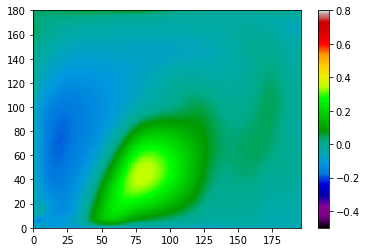

In [14]:
for n in range( e_handle.shape[0]):
    display.display(plt.gcf())
    plt.clf()
    plot_ssh(n)
    display.clear_output(wait=True)